# Exercice 1

# Data Clining + EDA

In [ ]:
%matplotlib inline
import numpy as np
!pip uninstall pandas-profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas as pd
import numpy as np
import zipfile
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import IPython
from sklearn.preprocessing import MinMaxScaler

from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


/home/javier/Documentos/data-mining/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_53042/1048784072.py:20: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
data_file_path = 'air_quality.csv'
full_data = pd.read_csv(data_file_path, sep=';')

In [3]:
full_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f"Nulls in Unnamed: 15: {full_data['Unnamed: 15'].isnull().sum()/len(full_data)*100}%")
print(f"Nulls in Unnamed: 16: {full_data['Unnamed: 16'].isnull().sum()/len(full_data)*100}%")

Nulls in Unnamed: 15: 100.0%
Nulls in Unnamed: 16: 100.0%


In [5]:
full_data = full_data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

In [6]:
mask = full_data.isna().all(axis=1)
all_nan_rows = full_data[mask]
all_nan_rows

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
full_data = full_data[~mask]

In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [9]:
profile = ProfileReport(
    full_data,
    title = "Simple Linear Regression - Precleaning Report",
    html  = {'style': {'full_width': True}},
    sort  = None)
profile.to_file(output_file='Precleaning.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 18.89it/s]


In [10]:
for col in full_data.select_dtypes(include='number'):
    if col == "Date" or col == "Time":
        continue
    print(f"Column: {col}")
    negative_values = full_data[full_data[col] < 0]

Column: PT08.S1(CO)
Column: NMHC(GT)
Column: PT08.S2(NMHC)
Column: NOx(GT)
Column: PT08.S3(NOx)
Column: NO2(GT)
Column: PT08.S4(NO2)
Column: PT08.S5(O3)


In [11]:
negative_values

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,01/04/2004,14.00.00,"1,7",-200.0,222.0,"-200,0",-200.0,99.0,-200.0,72.0,-200.0,-200.0,-200,-200,-200
525,01/04/2004,15.00.00,"1,9",-200.0,197.0,"-200,0",-200.0,108.0,-200.0,81.0,-200.0,-200.0,-200,-200,-200
526,01/04/2004,16.00.00,"2,3",-200.0,319.0,"-200,0",-200.0,131.0,-200.0,93.0,-200.0,-200.0,-200,-200,-200
701,08/04/2004,23.00.00,2,-200.0,137.0,"-200,0",-200.0,129.0,-200.0,106.0,-200.0,-200.0,-200,-200,-200
702,09/04/2004,00.00.00,"2,4",-200.0,189.0,"-200,0",-200.0,154.0,-200.0,109.0,-200.0,-200.0,-200,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,11/02/2005,17.00.00,"6,6",-200.0,-200.0,"-200,0",-200.0,1227.0,-200.0,326.0,-200.0,-200.0,-200,-200,-200
8112,11/02/2005,18.00.00,"6,5",-200.0,-200.0,"-200,0",-200.0,1061.0,-200.0,284.0,-200.0,-200.0,-200,-200,-200
8113,11/02/2005,19.00.00,"7,1",-200.0,-200.0,"-200,0",-200.0,1075.0,-200.0,289.0,-200.0,-200.0,-200,-200,-200
8114,11/02/2005,20.00.00,"4,9",-200.0,-200.0,"-200,0",-200.0,641.0,-200.0,215.0,-200.0,-200.0,-200,-200,-200


In [12]:
full_data = full_data.replace(-200.0, pd.NA)
full_data = full_data.replace(-200, pd.NA)
full_data = full_data.replace("-200", pd.NA)

In [13]:
full_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,<NA>,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,<NA>,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,<NA>,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,<NA>,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


## Missing porcentage of each column

In [14]:
for col in full_data.columns:
    num_nulls = full_data[col].isnull().sum()
    if num_nulls > 0:
        print(f"Column '{col}'\t has {num_nulls} null values\t ({num_nulls/len(full_data)*100:.2f}%)")

Column 'CO(GT)'	 has 1592 null values	 (17.01%)
Column 'PT08.S1(CO)'	 has 366 null values	 (3.91%)
Column 'NMHC(GT)'	 has 8443 null values	 (90.23%)
Column 'PT08.S2(NMHC)'	 has 366 null values	 (3.91%)
Column 'NOx(GT)'	 has 1639 null values	 (17.52%)
Column 'PT08.S3(NOx)'	 has 366 null values	 (3.91%)
Column 'NO2(GT)'	 has 1642 null values	 (17.55%)
Column 'PT08.S4(NO2)'	 has 366 null values	 (3.91%)
Column 'PT08.S5(O3)'	 has 366 null values	 (3.91%)
Column 'T'	 has 366 null values	 (3.91%)
Column 'RH'	 has 366 null values	 (3.91%)
Column 'AH'	 has 366 null values	 (3.91%)


In [15]:
full_data_cleaned = full_data.drop(columns=['NMHC(GT)'])

In [16]:
full_data_cleaned

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [17]:
for col in full_data_cleaned.columns:
    num_nulls = full_data_cleaned[col].isnull().sum()
    if num_nulls > 0:
        print(f"Column '{col}'\t has {num_nulls} null values\t ({num_nulls/len(full_data_cleaned)*100:.2f}%)")

Column 'CO(GT)'	 has 1592 null values	 (17.01%)
Column 'PT08.S1(CO)'	 has 366 null values	 (3.91%)
Column 'PT08.S2(NMHC)'	 has 366 null values	 (3.91%)
Column 'NOx(GT)'	 has 1639 null values	 (17.52%)
Column 'PT08.S3(NOx)'	 has 366 null values	 (3.91%)
Column 'NO2(GT)'	 has 1642 null values	 (17.55%)
Column 'PT08.S4(NO2)'	 has 366 null values	 (3.91%)
Column 'PT08.S5(O3)'	 has 366 null values	 (3.91%)
Column 'T'	 has 366 null values	 (3.91%)
Column 'RH'	 has 366 null values	 (3.91%)
Column 'AH'	 has 366 null values	 (3.91%)


In [18]:
filas_con_nan = full_data_cleaned[full_data_cleaned.isna().any(axis=1)]
filas_con_nan


,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9,11/03/2004,03.00.00,"0,6",1010.0,"1,7",561.0,<NA>,1705.0,<NA>,1235.0,501.0,"10,3","60,2","0,7517"
10,11/03/2004,04.00.00,<NA>,1011.0,"1,3",527.0,21.0,1818.0,34.0,1197.0,445.0,"10,1","60,5","0,7465"
33,12/03/2004,03.00.00,"0,8",889.0,"1,9",574.0,<NA>,1680.0,<NA>,1187.0,512.0,"7,0","62,3","0,6261"
34,12/03/2004,04.00.00,<NA>,831.0,"1,1",506.0,21.0,1893.0,32.0,1134.0,384.0,"6,1","65,9","0,6248"
39,12/03/2004,09.00.00,<NA>,1545.0,"22,1",1353.0,<NA>,767.0,<NA>,2058.0,1588.0,"9,2","56,2","0,6561"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,08/03/2005,03.00.00,"0,8",876.0,"1,9",576.0,<NA>,1040.0,<NA>,815.0,900.0,"1,0","56,7","0,3803"
8721,09/03/2005,03.00.00,"0,8",937.0,"2,2",600.0,<NA>,985.0,<NA>,873.0,885.0,"4,7","53,1","0,4589"
8745,10/03/2005,03.00.00,"1,1",1014.0,"4,4",731.0,<NA>,784.0,<NA>,1062.0,1038.0,"4,6","78,2","0,6684"
8755,10/03/2005,13.00.00,"2,3",1176.0,"9,8",969.0,<NA>,612.0,<NA>,1196.0,1300.0,"18,8","26,2","0,5637"


In [19]:
filas_con_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 9 to 8777
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2333 non-null   object
 1   Time           2333 non-null   object
 2   CO(GT)         741 non-null    object
 3   PT08.S1(CO)    1967 non-null   object
 4   C6H6(GT)       2333 non-null   object
 5   PT08.S2(NMHC)  1967 non-null   object
 6   NOx(GT)        694 non-null    object
 7   PT08.S3(NOx)   1967 non-null   object
 8   NO2(GT)        691 non-null    object
 9   PT08.S4(NO2)   1967 non-null   object
 10  PT08.S5(O3)    1967 non-null   object
 11  T              1967 non-null   object
 12  RH             1967 non-null   object
 13  AH             1967 non-null   object
dtypes: object(14)
memory usage: 273.4+ KB


In [20]:
mask = {
    'ah_missing': full_data_cleaned['AH'].isna() & full_data_cleaned['T'].notna() & full_data_cleaned['RH'].notna(),
    'rh_missing': full_data_cleaned['RH'].isna() & full_data_cleaned['T'].notna() & full_data_cleaned['AH'].notna()
}

print(full_data_cleaned.loc[mask['ah_missing'], 'AH'].sum())
print(full_data_cleaned.loc[mask['rh_missing'], 'RH'].sum())

0
0


In [21]:
full_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           9357 non-null   object
 1   Time           9357 non-null   object
 2   CO(GT)         7765 non-null   object
 3   PT08.S1(CO)    8991 non-null   object
 4   C6H6(GT)       9357 non-null   object
 5   PT08.S2(NMHC)  8991 non-null   object
 6   NOx(GT)        7718 non-null   object
 7   PT08.S3(NOx)   8991 non-null   object
 8   NO2(GT)        7715 non-null   object
 9   PT08.S4(NO2)   8991 non-null   object
 10  PT08.S5(O3)    8991 non-null   object
 11  T              8991 non-null   object
 12  RH             8991 non-null   object
 13  AH             8991 non-null   object
dtypes: object(14)
memory usage: 1.3+ MB


In [22]:
for col in full_data_cleaned.columns:
    num_nulls = full_data_cleaned[col].isnull().sum()
    if num_nulls > 0:
        print(f"Column '{col}'\t has {num_nulls} null values\t ({num_nulls/len(full_data_cleaned)*100:.2f}%)")

Column 'CO(GT)'	 has 1592 null values	 (17.01%)
Column 'PT08.S1(CO)'	 has 366 null values	 (3.91%)
Column 'PT08.S2(NMHC)'	 has 366 null values	 (3.91%)
Column 'NOx(GT)'	 has 1639 null values	 (17.52%)
Column 'PT08.S3(NOx)'	 has 366 null values	 (3.91%)
Column 'NO2(GT)'	 has 1642 null values	 (17.55%)
Column 'PT08.S4(NO2)'	 has 366 null values	 (3.91%)
Column 'PT08.S5(O3)'	 has 366 null values	 (3.91%)
Column 'T'	 has 366 null values	 (3.91%)
Column 'RH'	 has 366 null values	 (3.91%)
Column 'AH'	 has 366 null values	 (3.91%)


In [23]:
full_data_cleaned = full_data_cleaned.dropna()

In [24]:
full_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7024 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7024 non-null   object
 1   Time           7024 non-null   object
 2   CO(GT)         7024 non-null   object
 3   PT08.S1(CO)    7024 non-null   object
 4   C6H6(GT)       7024 non-null   object
 5   PT08.S2(NMHC)  7024 non-null   object
 6   NOx(GT)        7024 non-null   object
 7   PT08.S3(NOx)   7024 non-null   object
 8   NO2(GT)        7024 non-null   object
 9   PT08.S4(NO2)   7024 non-null   object
 10  PT08.S5(O3)    7024 non-null   object
 11  T              7024 non-null   object
 12  RH             7024 non-null   object
 13  AH             7024 non-null   object
dtypes: object(14)
memory usage: 823.1+ KB


In [25]:
profile = ProfileReport(
    full_data_cleaned,
    title = "Simple Linear Regression - Precleaning Report",
    html  = {'style': {'full_width': True}},
    sort  = None)
profile.to_file(output_file='Postcleaning.html')

/home/javier/Documentos/data-mining/.venv/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 22.88it/s]


In [26]:
full_data_cleaned = full_data_cleaned.drop(columns=['Date', 'Time'])

In [27]:
full_data_cleaned = full_data_cleaned.replace(",", ".", regex=True).astype(float)

/tmp/ipykernel_53042/1051142080.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_data_cleaned = full_data_cleaned.replace(",", ".", regex=True).astype(float)


In [28]:
objetive_column = 'C6H6(GT)'
y = full_data_cleaned.drop(columns=[objetive_column])
x = full_data_cleaned[objetive_column]

n = len(x)
y_len = y.shape[1]
k = 1

In [29]:
x_mean = np.mean(x)
y_mean = y.mean().to_numpy()

In [30]:
print(x_mean)
print(y_mean)

10.464194191343964
[-2.06648633e-01  1.11766444e+03  9.54511390e+02  2.49230780e+02
  8.19890518e+02  1.13571327e+02  1.44658343e+03  1.05333044e+03
  1.76254413e+01  4.89792284e+01  9.80810720e-01]


In [31]:
print("x")
print(x)
print("y")
print(y)
print("x_mean")
print(x_mean)
print("y_mean")
print(y_mean)

x
0       11.9
1        9.4
2        9.0
3        9.2
4        6.5
        ... 
9352    13.5
9353    11.4
9354    12.4
9355     9.5
9356    11.9
Name: C6H6(GT), Length: 7024, dtype: float64
y
      CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0        2.6       1360.0         1046.0    166.0        1056.0    113.0   
1        2.0       1292.0          955.0    103.0        1174.0     92.0   
2        2.2       1402.0          939.0    131.0        1140.0    114.0   
3        2.2       1376.0          948.0    172.0        1092.0    122.0   
4        1.6       1272.0          836.0    131.0        1205.0    116.0   
...      ...          ...            ...      ...           ...      ...   
9352     3.1       1314.0         1101.0    472.0         539.0    190.0   
9353     2.4       1163.0         1027.0    353.0         604.0    179.0   
9354     2.4       1142.0         1063.0    293.0         603.0    175.0   
9355     2.1       1003.0          961.0    235.

In [32]:
coeffients_tot = []

for i in range(y_len):
    y_i = y.iloc[:, i]
    y_i_mean = y_mean[i]

    coeffients = [0.0 for _ in range(k+1)]

    numerator = np.sum((x - x_mean) * (y_i - y_i_mean))
    denominator = np.sum((x - x_mean)**2)

    coeffients[1] = numerator / denominator      # b1
    coeffients[0] = y_i_mean - coeffients[1] * x_mean  # b0

    coeffients_tot.append(coeffients)

In [33]:
for i, coefs in enumerate(coeffients_tot):
    print(f"Variable {i}:\n\t b0 = {coefs[0]}\n\t b1 = {coefs[1]}")


Variable 0:
	 b0 = -5.441803397328531
	 b1 = 0.5002922029487636
Variable 1:
	 b0 = 848.5118184440655
	 b1 = 25.721294239479768
Variable 2:
	 b0 = 589.1522928109664
	 b1 = 34.915167860025065
Variable 3:
	 b0 = 39.51251926594429
	 b1 = 20.041510801640904
Variable 4:
	 b0 = 1078.1951088125884
	 b1 = -24.684613632555163
Variable 5:
	 b0 = 73.30474524593835
	 b1 = 3.8480346309552864
Variable 6:
	 b0 = 1065.3450017406537
	 b1 = 36.432659747534345
Variable 7:
	 b0 = 561.4528139212752
	 b1 = 47.00578138947304
Variable 8:
	 b0 = 15.126479504079157
	 b1 = 0.23881072868005004
Variable 9:
	 b0 = 49.64322044999336
	 b1 = -0.06345372399852188
Variable 10:
	 b0 = 0.8702984227822446
	 b1 = 0.010560994528982981


In [34]:
o_2 = []

for i, coefs in enumerate(coeffients_tot):
    b0 = coefs[0]
    b1 = coefs[1]

    y_i = y.iloc[:, i]    # column i of y
    y_pred = b0 + b1 * x  # prediction for that variable

    residuals = y_i - y_pred
    RSS = np.sum(residuals**2)

    print(f"Variable {i}: RSS = {RSS}")

    o_2.append(RSS / (n - 2))   # n - k - 1 = n - 2 in a simple regression


Variable 0: RSS = 3269041.74937351
Variable 1: RSS = 76875507.80544609
Variable 2: RSS = 17468155.44018617
Variable 3: RSS = 146411569.58974612
Variable 4: RSS = 213910907.97113493
Variable 5: RSS = 10067647.581135135
Variable 6: RSS = 369124217.53116035
Variable 7: RSS = 300265878.6204801
Variable 8: RSS = 531737.909485974
Variable 9: RSS = 2127621.7787072067
Variable 10: RSS = 1089.7770121574317


In [35]:
print(o_2)

[np.float64(465.54282958893623), np.float64(10947.808004193404), np.float64(2487.6325035867517), np.float64(20850.4086570416), np.float64(30462.9604060289), np.float64(1433.729362166781), np.float64(52566.821066812925), np.float64(42760.73463692397), np.float64(75.72456700170521), np.float64(302.9937024647119), np.float64(0.15519467561341949)]


In [36]:
X_matrix = np.vstack([np.ones(len(x)), x]).T

print(X_matrix)

[[ 1.  11.9]
 [ 1.   9.4]
 [ 1.   9. ]
 ...
 [ 1.  12.4]
 [ 1.   9.5]
 [ 1.  11.9]]


In [37]:
XT_X = np.dot(X_matrix.T, X_matrix)

print(XT_X)

[[   7024.     73500.5 ]
 [  73500.5  1161198.43]]


In [38]:
XT_X_inv = np.linalg.inv(XT_X)

print(XT_X_inv)

[[ 4.21650742e-04 -2.66892717e-05]
 [-2.66892717e-05  2.55053291e-06]]


In [39]:
cov_matrix = []
for element in o_2:
    var_cov_matrix = element * XT_X_inv
    cov_matrix.append(var_cov_matrix)

In [40]:
cov_matrix

[array([[ 0.19629648, -0.012425  ],
        [-0.012425  ,  0.00118738]]),
 array([[ 4.61615137, -0.29218902],
        [-0.29218902,  0.02792274]]),
 array([[ 1.04891209, -0.0663931 ],
        [-0.0663931 ,  0.00634479]]),
 array([[ 8.79159029, -0.55648222],
        [-0.55648222,  0.05317965]]),
 array([[12.84472987, -0.81303423],
        [-0.81303423,  0.07769678]]),
 array([[ 0.60453305, -0.03826519],
        [-0.03826519,  0.00365677]]),
 array([[22.16483912, -1.40297017],
        [-1.40297017,  0.13407341]]),
 array([[18.0300955 , -1.14125286],
        [-1.14125286,  0.10906266]]),
 array([[ 0.03192932, -0.00202103],
        [-0.00202103,  0.00019314]]),
 array([[ 0.12775752, -0.00808668],
        [-0.00808668,  0.0007728 ]]),
 array([[ 6.54379502e-05, -4.14203286e-06],
        [-4.14203286e-06,  3.95829128e-07]])]

In [41]:
SEs = []
for cov_matrixs in cov_matrix:
    Se = []
    for coeffienct in range(k + 1):
        Se.append(np.sqrt(cov_matrixs[coeffienct, coeffienct]))
    SEs.append(Se)

In [42]:
SEs

[[np.float64(0.44305358553773716), np.float64(0.03445841419860733)],
 [np.float64(2.148523067428578), np.float64(0.16710100129956032)],
 [np.float64(1.024164094102795), np.float64(0.0796541811508027)],
 [np.float64(2.9650615991944367), np.float64(0.23060714108750732)],
 [np.float64(3.583954501267099), np.float64(0.27874142700760507)],
 [np.float64(0.7775172343953239), np.float64(0.06047126529138025)],
 [np.float64(4.707954876796992), np.float64(0.36616035727625607)],
 [np.float64(4.246185994508819), np.float64(0.33024636418532666)],
 [np.float64(0.17868777206306777), np.float64(0.013897409846040116)],
 [np.float64(0.35743183902593234), np.float64(0.027799198017948227)],
 [np.float64(0.008089372668496297), np.float64(0.0006291495275444433)]]

In [43]:
MAE = []
for i, coefs in enumerate(coeffients_tot):
    b0 = coefs[0]
    b1 = coefs[1]

    y_i = y.iloc[:, i]    # column i of y
    y_pred = b0 + b1 * x  # predicted variable

    residuals = y_i - y_pred
    MAE.append(np.mean(abs(residuals)))

    print(f"Variable {i}: MAE = {MAE[i]}")

Variable 0: MAE = 5.259764504298027
Variable 1: MAE = 81.6540052330206
Variable 2: MAE = 36.880432106511506
Variable 3: MAE = 113.0776498334086
Variable 4: MAE = 125.950584110207
Variable 5: MAE = 29.44237430985199
Variable 6: MAE = 195.3494439226288
Variable 7: MAE = 161.85026788117437
Variable 8: MAE = 7.0655422079714345
Variable 9: MAE = 14.545817924184702
Variable 10: MAE = 0.3190349652005697


In [44]:
for i, coefs in enumerate(coeffients_tot):
    b0 = coefs[0]
    b1 = coefs[1]

    y_i = y.iloc[:, i]    # column i of y
    y_pred = b0 + b1 * x  # predicted variable

    residuals = y_i - y_pred
    MSE = np.mean(residuals**2)

    print(f"Variable {i}: MSE = {MSE}")


Variable 0: MSE = 465.41027183563637
Variable 1: MSE = 10944.690746789021
Variable 2: MSE = 2486.9241799809465
Variable 3: MSE = 20844.471752526497
Variable 4: MSE = 30454.286442359757
Variable 5: MSE = 1433.32112487687
Variable 6: MSE = 52551.853293160646
Variable 7: MSE = 42748.55902911163
Variable 8: MSE = 75.7030053368414
Variable 9: MSE = 302.90742863143606
Variable 10: MSE = 0.15515048578551136


In [45]:
RMSE = []
residuals = []
for i, coefs in enumerate(coeffients_tot):
    b0 = coefs[0]
    b1 = coefs[1]

    y_i = y.iloc[:, i]    # column i of y
    y_pred = b0 + b1 * x  # predicted variable

    residuals.append(y_i - y_pred)
    RMSE.append(np.sqrt(np.mean(residuals[i]**2)))

    print(f"Variable {i}: RMSE = {RMSE[i]}")

Variable 0: RMSE = 21.573369505842994
Variable 1: RMSE = 104.61687601333267
Variable 2: RMSE = 49.869070374140186
Variable 3: RMSE = 144.37614675744223
Variable 4: RMSE = 174.51156535416143
Variable 5: RMSE = 37.859227737460124
Variable 6: RMSE = 229.24190998410532
Variable 7: RMSE = 206.7572466181334
Variable 8: RMSE = 8.700747401047877
Variable 9: RMSE = 17.404235939317648
Variable 10: RMSE = 0.39389146447404944


In [46]:
diferencia = []

for i in range(len(RMSE)):
    dif = RMSE[i] - MAE[i]
    diferencia.append(dif)
    print(f"Variable {i}: diference = {dif}")


Variable 0: diference = 16.313605001544968
Variable 1: diference = 22.962870780312073
Variable 2: diference = 12.98863826762868
Variable 3: diference = 31.29849692403363
Variable 4: diference = 48.56098124395443
Variable 5: diference = 8.416853427608135
Variable 6: diference = 33.89246606147651
Variable 7: diference = 44.90697873695902
Variable 8: diference = 1.6352051930764429
Variable 9: diference = 2.858418015132946
Variable 10: diference = 0.07485649927347976


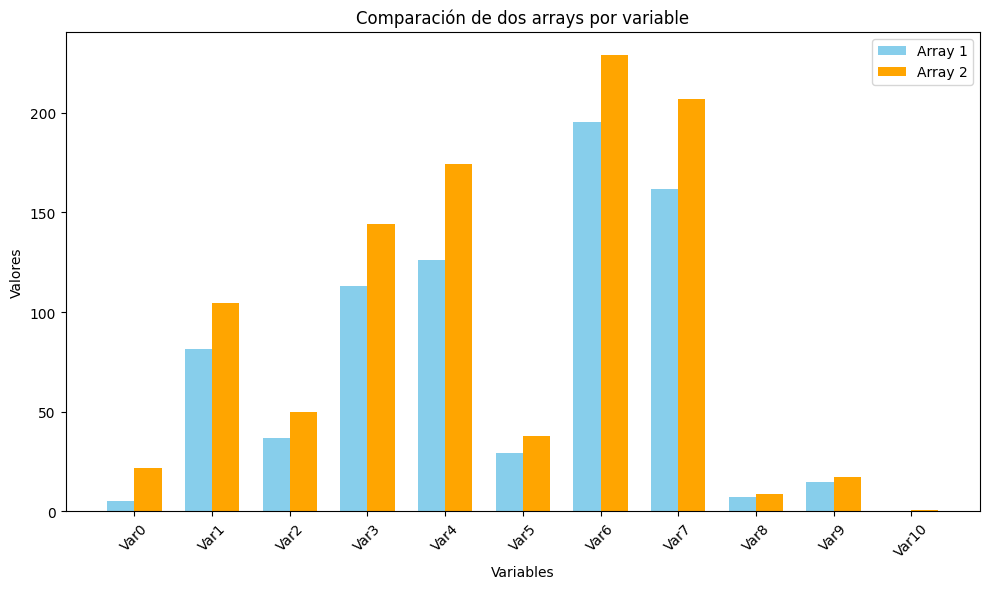

In [47]:
variables = [f"Var{i}" for i in range(len(MAE))]

x = np.arange(len(variables))  # posiciones en x
width = 0.35  # ancho de las barras

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10,6))

# Dibujar barras lado a lado
ax.bar(x - width/2, MAE, width, label='Array 1', color='skyblue')
ax.bar(x + width/2, RMSE, width, label='Array 2', color='orange')

# Configuración de ejes
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=45)
ax.set_xlabel("Variables")
ax.set_ylabel("Valores")
ax.set_title("Comparación de dos arrays por variable")
ax.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


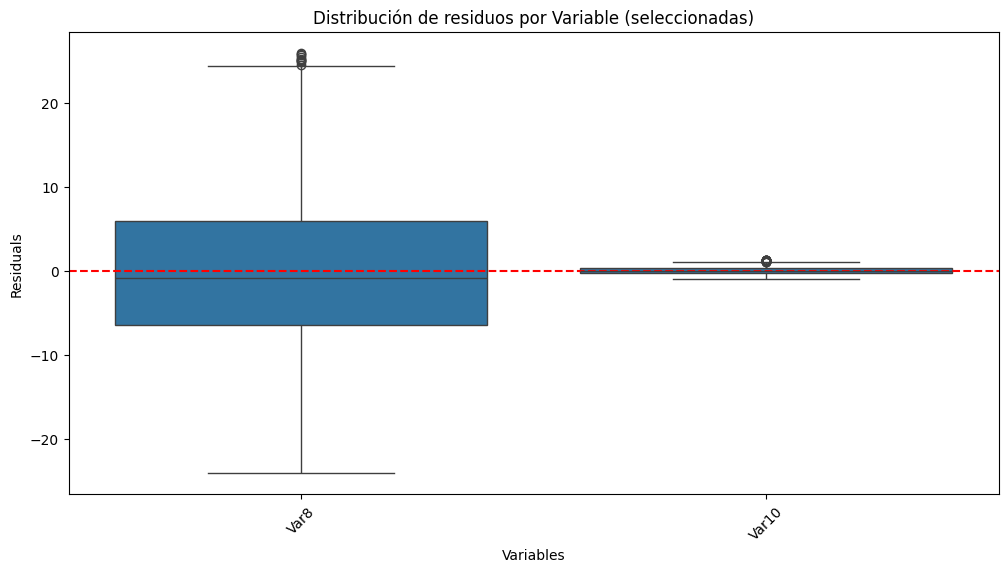

In [48]:


variables = [f"Var{i}" for i in range(len(RMSE))]

residuals_long = pd.DataFrame({
    'Residual': np.concatenate(residuals),
    'Variable': np.repeat(variables, [len(r) for r in residuals])
})

variables_filtradas = ['Var8', 'Var10']
residuals_filtrados = residuals_long[residuals_long['Variable'].isin(variables_filtradas)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Variable', y='Residual', data=residuals_filtrados)
plt.axhline(0, color='red', linestyle='--')
plt.title("Distribución de residuos por Variable (seleccionadas)")
plt.xlabel("Variables")
plt.ylabel("Residuals")
plt.xticks(rotation=45)
plt.show()


In [49]:
def plot_safe(ax, x_val, y_val, x_label, color):
    X_matrix = x_val.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_matrix, y_val)
    r2 = model.score(X_matrix, y_val)

    line_x = np.linspace(x_val.min(), x_val.max(), 100).reshape(-1, 1)
    line_y = model.predict(line_x)

    ax.scatter(x_val, y_val, alpha=0.4, color=color, s=20, label='Data Points')
    ax.plot(line_x, line_y, color='red', linewidth=2,
            label=f'Fit: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$R^2 = {r2:.2f}$')

    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel('Benzene C6H6(GT)', fontsize=12)
    ax.set_title(f'Relationship: Benzene vs {x_label}', fontsize=13)
    ax.legend(loc='upper right', frameon=True)
    ax.grid(True, linestyle='--', alpha=0.5)

Datos extraídos correctamente de full_data_cleaned.


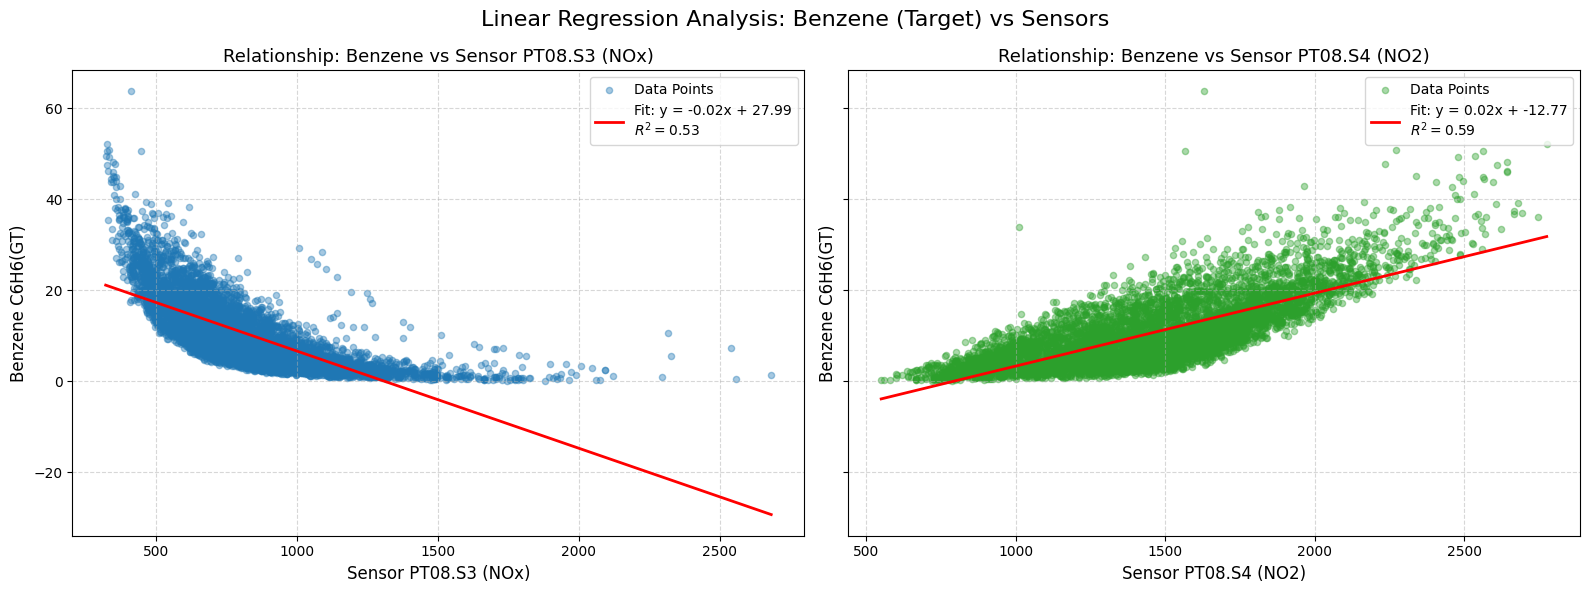

In [50]:
try:
    target_data = full_data_cleaned['C6H6(GT)'].values
    feature_s3 = full_data_cleaned['PT08.S3(NOx)'].values
    feature_s4 = full_data_cleaned['PT08.S4(NO2)'].values

    print("Datos extraídos correctamente de full_data_cleaned.")
except KeyError as e:
    print(f"Error: No encuentro la columna {e}. \nColumnas disponibles: {full_data_cleaned.columns.tolist()}")
    raise e

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Linear Regression Analysis: Benzene (Target) vs Sensors', fontsize=16)

plot_safe(axes[0], feature_s3, target_data, 'Sensor PT08.S3 (NOx)', 'tab:blue')

plot_safe(axes[1], feature_s4, target_data, 'Sensor PT08.S4 (NO2)', 'tab:green')

plt.tight_layout()
plt.show()

In [52]:


feature_cols = [
    'CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)',
    'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
    'T', 'RH', 'AH'
]

data_for_df = {
    'Feature': feature_cols,
    'RSS': RSS,
    'RMSE': RMSE,
    'MAE': MAE,
    'o_2': o_2
}
error_df = pd.DataFrame(data_for_df)

metric_cols = ['RSS', 'RMSE', 'MAE', 'o_2']
scaler = MinMaxScaler()
error_df[metric_cols] = scaler.fit_transform(error_df[metric_cols])

error_df['RSS'] = 1 - error_df['RSS']


dimensions_to_plot = ['RSS', 'RMSE', 'MAE', 'o_2']

fig = px.parallel_coordinates(
    error_df,
    color='RSS',
    dimensions=dimensions_to_plot,
    color_continuous_scale=px.colors.sequential.Inferno,
    color_continuous_midpoint=error_df['RSS'].mean(),
)

fig.update_traces(
    dimensions=[
        dict(label='RSS Invertido (↓)', values=error_df['RSS'], range=[0, 1]),
        dict(label='RMSE (↓)', values=error_df['RMSE'], range=[0, 1]),
        dict(label='MAE (↓)', values=error_df['MAE'], range=[0, 1]),
        dict(label='o_2 (↓)', values=error_df['o_2'], range=[0, 1])
    ],

    customdata=error_df['Feature'].values.tolist()
)

x_pos = -0.05


y_values = error_df['RSS'].values

annotations = []

for feature, y in zip(error_df['Feature'], y_values):
    annotations.append(dict(
        x=x_pos,
        y=y,
        text=feature,
        showarrow=False,
        font=dict(size=12),
        align='right'
    ))

fig.update_layout(annotations=annotations)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed